In [155]:
from Bio import pairwise2
from Bio.Seq import Seq
import numpy as np
import matplotlib.pyplot as plt 
from Bio.pairwise2 import format_alignment
import pandas as pd
import seaborn as sns

In [156]:
out_path = "/home/vsevim/prj/1012-ckd/S1/analysis/folding"

In [157]:
Guide1_wo_PS = "GUUUCAGAGCUAAGCACAAGAGUGCAUAGCAAGUUGAAAUAAGGCUAGUCCGUUUACAACUUGGCCGCUUUAAGGCCGGUCCUAGCAAGGCCAAGUGGCACCCGAGUCGGGUGCUUUU"
Guide2_wo_PS = "GUUUAAGAGCUAAGCUGGAAACAGCAUAGCAAGUUUAAAUAAGGCUAGUCCGUUAUCAACUUGGCCGCUUUAAGGCCGGUCCUAGCAAGGCCAAGUGGCACCGAGUCGGUGCUUUU"
# Guide2_wo_PS is identical to the sequence in the 10x data sheet
# https://cdn.10xgenomics.com/image/upload/v1660261286/support-documents/CG000197_GuideRNA_SpecificationsCompatible_withFeatureBarcodingtechnology_forCRISPRScreening_Rev-A.pdf

Wrong_Guide1_wo_PS = "GUUUCAGAGCUAAGCACAAGAGUGCAUAGCAAGUUGAAAUAAGGCUAGUCCGUUUACAACUUGGCCGCUUUAAGGCCGGUCCUAGCAAGGCCAAGUGGCACCCGAGUCGGGUGCUUUU"
Wrong_Guide2_wo_PS = "GUUUAAGAGCUAAGCUGGAAACAGCAUAGCAAGUUUAAAUAAGGCUAGUCCGUUAUCAACUUGGCCGCUUUAAGGCCGGUCCUAGCAAGGCCAAGUGGCACCGAGUCGGUGCUUUU"

CaptureSeq1 = "GCTTTAAGGCCGGTCCTAGCAA"

PS1s = [ "GCGCAGCTCGGAACCCGCCA",
        "GCTGCGACTCGGCGGAGTCC",
        "GGCTCGGGGACACATAGCTG",
        "GGCGGTCCACACTTACCTGC",
        "GAGCGGGCTGAGGCACCTTC",
        "GGAGCGGAGGGGAGACTGAC",
        "GAGAGAAGAGCCAAGCCGG",
        "GTCACGAGGAGCTGAGCTGG",
        "GGGAACCATGTCCAGTTAG",
        "GAACAGTGAGGAGGCCCCAG",
        "GTGCGGTCAGGCTCTGTG",
        "GGAGGTAAGTGCCAGTGTG",
        "GGGCCTCTTCAGTCATGT",
        "GTTTGGAAACTGCTCCCCAT",
        "GGGTGCGGCCCTGAGCCCA",
        "GCCTCTGCGCCCACACTCCA",
        "GGCCGGGCCTGCCATCAGAG",
        "GTACCACAGCCACTCTGA",
        "GAGAGCAGCCACACCTGGAG",
        "GGCAGGCTCCTCTCCAGGTG",
        "GGCACAGCCACATGTCTGCG",
        "GTTGAAACTTCTAGTTGTAA",
        "GCAGGAGTGACTGGACACTG",
        "GTGAAAGAATGACAATGGTG",
        "GACGTGTAGAAGGCACATCA",
        "GACAGTGTGTGTCAGGTGCA",
        "GCCTGAAGGCTCAAAGTCAC",
        "GCTAGACCTGAACCCTGAGA",
        "GGTTGAACAAACAGCTTCAG",
        "GGACACTGTAGCGTTGTAGA",
        "GCTGAGACACCCCATTCCCA",
        "GGATCTGCAGTCATAAGACC",
        "GGACCACATCCTAATCGTCA",
        "GTGAAATGCATCCATCTGTG",
        "GCAATGAGCACCTATGCACT",
        "GTTGCTACAATACAGTAGTA",
        "GACAGGATGATTCAGCACTG",
        "GGTGGGTCCACTGGTGTCAG",
        "GGCAGCCCGATTCCGCCACG",
        "GAAATAATTACCTGCGTGTG",
        "GAATGGAACAGTATTACACC",
        "GCTGGGGCTTAAAAACAACT",
        "GAGCCGGGTGCAGCCAGGCG",
        "GAGAAAAGCCGGGTGCAGCC",
        "GGGTTACTGAAGTTACTGGG",
        "GAGAGTGAATGATTAACTCA",
        "GAAGGAGAGTGCTGAAACGG",
        "GTCCACAGGGAAGAGCCAGT",
        "GTGAGCAGCTCTCCTGCCTA",
        "GCAAAGTCCATGCCTTAGGC",
        "GATGCCCTACCTGATTCATG",
        "GTGCACCTCATGAATCAGGT",
        "GAGATGTGGTGCTGAACCTG",
        "GAGGCTGATGTCAGCCCCAT",
        "GCTGCATGGGGCGCGAATCA",
        "GTGTGCAACCTCCGCCGTTG",
        "GGTCAGGTAGAGGGATTGAG",
        "GTATGGAGGGCTGGATCTGC",
        "GTTAACAGTCTTCCTCAGCA",
        "GTAGGCAACATCTAATGAGC",
        "GAGATTGCCAGGGGATACGG",
        "GGGTAGACAAAGCCACCTCA",
        "GTCTCAGATCCTACATACGA",
        "GGGTCAATCTTGAACCCCTG",
        "GAAAAGTAGGACATACGTGG",
        "GGCATAACCCTAGATCCCAA"]
PS2s = ["GAAGCCCTTGGCCATGGTGA",
        "GGCTGGGCGTAGCTGCGACT",
        "GGGCGAGTGCCGGCGAGTAG",
        "GTAGCGGCCTACTCAGTCAG",
        "GGAGCCCCGGAACTGAGAGA",
        "GCCCGGTTCAGAGCGACCTG",
        "GCTGAACCTCCAGAAACCAC",
        "GGGTGGGGGAGGTAGAACCC",
        "GCCTGTTAGAACAGTGAGG",
        "GAAGAGAGAGAGGCCAGGA",
        "GCTCTGTGTGGCACTGCCGT",
        "GGAGTTGACAGGGGCTGTA",
        "GGCAGAGAACATCTAGACTG",
        "GTGTTTTTGAGGCCTTTCTG",
        "GAAGGAAGAAGGGCCAACAG",
        "GATTTTCTCAAGGAGCACAA",
        "GAGTGGCTGTGGTACTACT",
        "GCGCATTAGCTCAAGACCG",
        "GCACAGCCCAGGAGAGCAA",
        "GACTGAAGAGTTAGTCTTG",
        "GTTATGGGCATACCAACCAA",
        "GATCTAACCCCATATGAGAA",
        "GAAGTAACTTTAATTGTCCT",
        "GGAAAGCCGAGCTCGCCTTG",
        "GGCGACATTGAACCTGCTCA",
        "GCCATCAAAGGGATGCAGTC",
        "GAATAGGGTAGATCCCTGGT",
        "GCCAGTTTAATAACAGCACG",
        "GGAGACTGAGCCAACTGACT",
        "GACTGAGCCAACTGACTTGG",
        "GGGCTGGATTGTGGTAAGAC",
        "GCTGGCCCACCACCACCGAG",
        "GCTCCCATCCCATTCACAGT",
        "GAATGTCTAGAACGAGCTTA",
        "GGAAAAGACACTTCCTGACA",
        "GGGAAATAACCAGACTTGTG",
        "GGGCTGTGGGGACCTGACTG",
        "GCTTTAAGACTTGAAGGCTG",
        "GCGAAGCCGGGATGTCCCTG",
        "GTACCTTCCCGGTATCACCA",
        "GGGATGGTACAAACTGGCCA",
        "GTGCTCAGGATGGTACAAAC",
        "GAGCCGCTGTGACAGCACTT",
        "GCTTCAGACTATGACAAGAG",
        "GCATTCCCACCTAGCTACAG",
        "GGGAGCTCTATAATTAACCC",
        "GTTCTCACACTTTCCCGTCT",
        "GGAGGAGAGAGGGAGCAAGC",
        "GTTGCCTAGCTACCTCGGAG",
        "GAGGCCCTGCATACACAAAG",
        "GTCAGGTAGGGCATTTCTGT",
        "GATCAGGTAGGGCATTTCTG",
        "GAACAGGTGCTCAAGGCGAA",
        "GAGAGTGGAGTCCCGCACCA",
        "GTGCACCCGGCTAGGACCGG",
        "GCCCGAGCAGTGGCTCGCTA",
        "GGAGGACGATCGTACTCCAG",
        "GCCTTGGCTAAACCGCTCCC",
        "GATCACTAATGCCTTTGAGG",
        "GTACCCATATTGCAGGTGGG",
        "GGACCAGAAAGGGCTGCCCA",
        "GTCAGCCACCAACACAAATC",
        "GATGACCCACCTCCAAACTG",
        "GCATGTGGGATCCACTCCTG",
        "GTGGGTGAGAGTAGTTCTGG",
        "GATGACGAGCTATGGAAACC"
        ]
names = ["CD13-1",
        "CD55-1",
        "CD73-1",
        "FUBP1-1",
        "C150rf40-1",
        "MAFF-1",
        "FTH1-1",
        "FTH1-2",
        "PLIN3-1",
        "PLIN3-2",
        "TKT-1",
        "TKT-2",
        "LGALS3-1",
        "LGALS3-2",
        "CSTB-1",
        "CSTB-2",
        "CTSB-1",
        "CTSB-2",
        "KLF6-1",
        "KLF6-2",
        "DE1-1",
        "DE1-2",
        "DE2-1",
        "DE2-2",
        "DE3-1",
        "DE3-2",
        "DE4-1",
        "DE4-2",
        "DE5-1",
        "DE5-2",
        "DE6-1",
        "DE6-2",
        "DE7-1",
        "DE7-2",
        "DE8-1",
        "DE8-2",
        "DE9-1",
        "DE9-2",
        "DE10-1",
        "DE10-2",
        "DE11-1",
        "DE11-2",
        "DE12-1",
        "DE12-2",
        "DE13-1",
        "DE13-2",
        "DE14-1",
        "DE14-2",
        "DE15-1",
        "DE15-2",
        "DE16-1",
        "DE16-2",
        "DE17-1",
        "DE17-2",
        "NTCE1-1",
        "NTCE2-1",
        "NTCE3-1",
        "NTCE4-1",
        "GDOC1-1",
        "GDOC2-1",
        "GDOC3-1",
        "GDOC4-1",
        "CCCE1-1",
        "CCCE2-1",
        "CCCE3-1",
        "CCCE4-1"
        ]

# PS1s = ["GGGAGCTGGCGAAGCCGCAG",
#         "GCTGACCCTGCGGGGAAGAA",
#         "GCATCAAATGCCAAATTCCA",
#         "GAGCGGCGACGCTAAACACG",
#         "GTGTCGTGATGCGTAGACGG"
#         ]
# PS2s = ["GGGAAAGGCGGTGAAGAAAG",
#         "GTCGCCAAGCCCCGCGAGCA",
#         "GCTGAAGTGAAATGTGAGAG",
#         "GTTCGGGGACCTTGCAGCAC",
#         "GTCATCAAGGAGCATTCCGT"
#         ]
# names = ["NEUROG2-1",
#         "GATA5-1",   
#         "MEOX1-1",   
#         "HLF-1",     
#         "NEG-CTRL-1"
#         ]

In [158]:
f = open(out_path + "/sgRNA_seqs.fa", "w")
for (construct, g1, g2) in zip(names, PS1s, PS2s):
    # Replace T with U in the guide sequences
    g1 = g1.replace("T", "U")
    g2 = g2.replace("T", "U")
    g1 = ">%sa\n%s\n"%(construct, g1+Guide1_wo_PS)
    g2 = ">%sb\n%s\n"%(construct, g2+Guide2_wo_PS)

    # Check the free energies of just the scaffolds wo protospacer
    #g1 = ">%sa\n%s\n"%(construct, Guide1_wo_PS)
    #g2 = ">%sb\n%s\n"%(construct, Guide2_wo_PS)

    f.write(g1)
    f.write(g2)
f.close()

In [159]:
%%bash
cd /home/vsevim/prj/1012-ckd/S1/analysis/folding/
./fold.sh

In [160]:
# Read linear_energies.txt under out_path into a dataframe
# name columns as "protospacer" and "energy"
with open(out_path + "/linear_energies.txt") as f:
    lines = f.readlines()
    lines = [line.strip().split("\t") for line in lines]
    lines = [[line[0], float(line[1])] for line in lines]
    df = pd.DataFrame(lines, columns=["protospacer", "energy"])
# Group df by protospacer, and take the smallest energy
df = df.groupby("protospacer").min()
# Reindex df by row number
df = df.reset_index()

In [161]:
len(df)

132

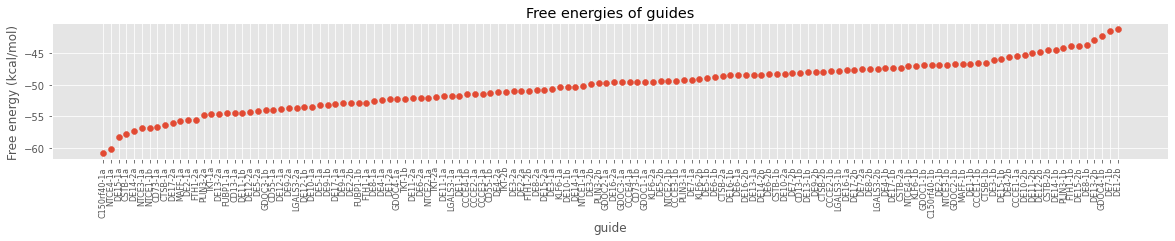

In [162]:
# Sort dataframe by energy into a new dataframe
# Plot energies as a scatter plot
# x-axis: protospacer sequence
# y-axis: energy
# Rotate x-axis labels by 90 degrees
# Make plot size 20x7
# Make x-axis labels smaller
# Make x-axis label "Protospacer sequence"
# Make y-axis label "Energy (kcal/mol)"
# Make title "Energy of protospacer sequences"
# Save plot to out_path + "/energy_plot.png"
# Use ggplot style
plt.style.use("ggplot")
df_sorted = df.sort_values("energy")
plt.figure(figsize=(20,2.5))
plt.scatter(df_sorted["protospacer"], df_sorted["energy"])
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.xlabel("guide")
plt.ylabel("Free energy (kcal/mol)")
plt.title("Free energies of guides")
plt.savefig(out_path + "/energy_plot.png")

In [163]:
# take even numbered rows from df
# name columns as "protospacer" and "energy_a"
# reset index
df2 = df.iloc[::2, :]
df2.columns = ["protospacer", "energy_a"]
df2 = df2.reset_index(drop=True)

# take odd numbered rows from df
# name columns as "protospacer" and "energy_b"
# reset index
df3 = df.iloc[1::2, :]
df3.columns = ["protospacer", "energy_b"]
df3 = df3.reset_index(drop=True)

In [164]:
# delete last character of protospacer sequence in df2
# delete first character of protospacer sequence in df3
df2["protospacer"] = df2["protospacer"].str[:-1]
df3["protospacer"] = df3["protospacer"].str[:-1]

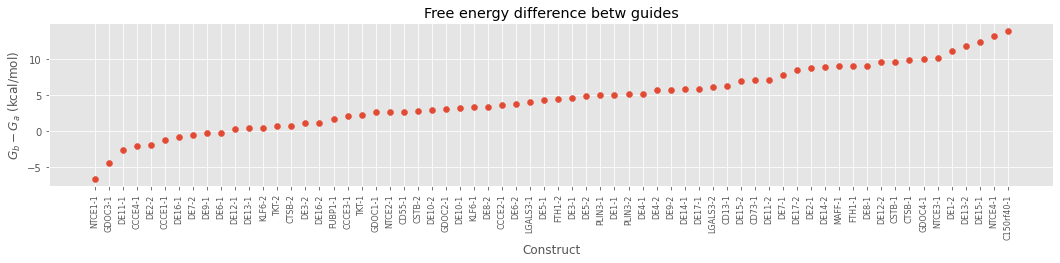

In [165]:
# inner join df2 and df3 on protospacer sequence
# calculate difference between energy_a and energy_b
# name column as "energy_diff"
# sort by energy_diff
df4 = pd.merge(df2, df3, on="protospacer", how="inner")
df4.rename(columns={'protospacer':'Target'}, inplace=True)
df4["energy_diff"] = df4["energy_b"] - df4["energy_a"]
df4 = df4.sort_values("energy_diff")

# Plot energy_diff as a scatter plot
# x-axis: protospacer sequence
# y-axis: energy_diff
# x axis label "Protospacer"
# y axis label "Energy difference, guide1-guide2 (kcal/mol)"
# Rotate x-axis labels by 90 degrees
# Make plot size 20x7
# Make x-axis labels smaller
# Save plot to out_path + "/energy_diff_plot.png"
# Use ggplot style
plt.style.use("ggplot")
plt.scatter(df4["Target"], df4["energy_diff"])
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.xlabel("Construct")
plt.ylabel("$G_b - G_a$ (kcal/mol)")
plt.title("Free energy difference betw guides")
plt.gcf().set_size_inches(18, 3)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.savefig(out_path + "/energy_diff_plot.png")
plt.show()

In [166]:
df4.head()

,Target,energy_a,energy_b,energy_diff
58,NTCE1-1,-50.2,-56.8,-6.6
51,GDOC3-1,-49.6,-54.0,-4.4
16,DE11-1,-51.8,-54.4,-2.6
4,CCCE4-1,-49.5,-51.5,-2.0
31,DE2-2,-51.0,-52.9,-1.9


Load the guide count sums

In [167]:
tsv_name = "/home/vsevim/prj/1012-ckd/S1/analysis/folding/guide_count_sums.tsv" 
#tsv_name = "/home/vsevim/prj/1012-ckd/S1/analysis/folding/guide_count_sums_TF_perturbseq.tsv" 


In [168]:
df_guide_sums = pd.read_csv(tsv_name, sep="\t")
select_nonzero = (df_guide_sums.a > 0) & (df_guide_sums.b > 0)
df_guide_sums = df_guide_sums[select_nonzero]
len(df_guide_sums)

60

In [169]:
df_guide_sums.head()

,Target,a,b
0,C15orf40-1,346911,510226
1,CCCE1-1,309818,268667
2,CCCE2-1,517140,91771
3,CCCE3-1,210044,302172
4,CCCE4-1,300116,19745


debug

In [170]:
df_guide_sums['log2_fold'] = np.log2(df_guide_sums.a/df_guide_sums.b)

In [171]:
#df_guide_sums.merge(df4, on='Target', how='inner')
df4.head()

,Target,energy_a,energy_b,energy_diff
58,NTCE1-1,-50.2,-56.8,-6.6
51,GDOC3-1,-49.6,-54.0,-4.4
16,DE11-1,-51.8,-54.4,-2.6
4,CCCE4-1,-49.5,-51.5,-2.0
31,DE2-2,-51.0,-52.9,-1.9


------------------

In [172]:
df_guide_sums['log2_fold'] = np.log2(df_guide_sums.a/df_guide_sums.b)
df_guide_sums = df_guide_sums.merge(df4, on='Target', how='inner')
df_guide_sums['energy_diff']

0     -1.2
1      3.6
2      2.1
3     -2.0
4      6.3
5      2.7
6      7.1
7      9.6
8      2.8
9      9.8
10     0.7
11     5.0
12    11.1
13     3.2
14     2.9
15    -2.6
16     7.1
17     0.3
18     9.6
19     0.4
20    11.8
21     5.8
22     8.9
23    12.3
24     7.0
25    -0.8
26     5.8
27     8.5
28    -1.9
29     4.6
30     1.1
31     5.1
32     5.7
33     4.3
34     4.8
35    -0.3
36     3.8
37     7.8
38    -0.6
39     9.0
40     3.3
41    -0.3
42     9.0
43     1.7
44     2.6
45     3.0
46    -4.4
47    10.0
48     3.3
49     0.5
50     4.0
51     6.1
52     9.0
53    10.1
54    13.1
55     5.0
56     5.1
57     2.3
58     0.7
Name: energy_diff, dtype: float64

In [173]:
df_guide_sums.sort_values(by='energy_diff', ascending=False).head(10)

,Target,a,b,log2_fold,energy_a,energy_b,energy_diff
54,NTCE4-1,365258,274339,0.412956,-60.1,-47.0,13.1
23,DE15-1,151540,76127,0.993219,-58.2,-45.9,12.3
20,DE13-2,34337,122058,-1.829731,-54.6,-42.8,11.8
12,DE1-2,454760,196021,1.214097,-52.3,-41.2,11.1
53,NTCE3-1,372206,572143,-0.620274,-56.9,-46.8,10.1
47,GDOC4-1,267680,240390,0.155132,-52.3,-42.3,10.0
9,CTSB-1,255266,195362,0.385852,-56.3,-46.5,9.8
7,CSTB-1,59433,155377,-1.386437,-57.8,-48.2,9.6
18,DE12-2,18003,136683,-2.924525,-54.3,-44.7,9.6
52,MAFF-1,408894,112139,1.866439,-55.7,-46.7,9.0


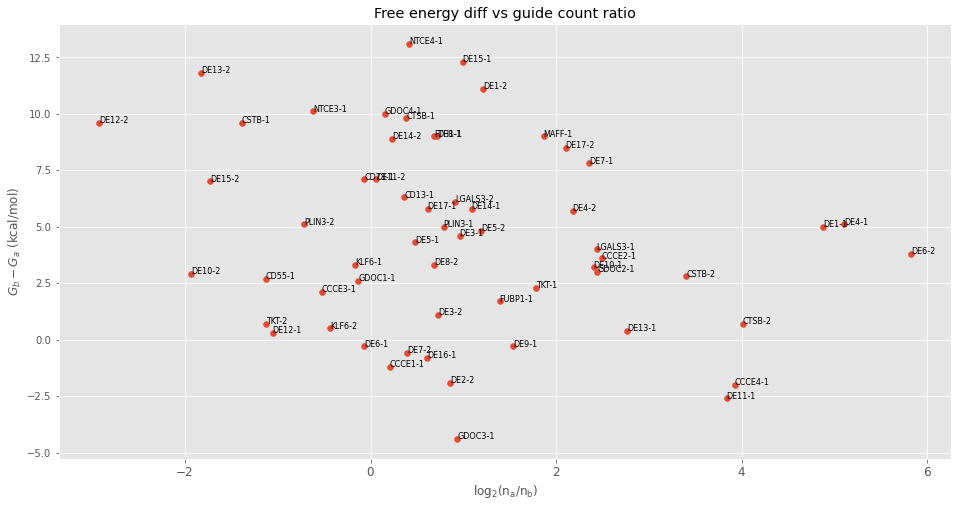

In [176]:
plt.style.use("ggplot")
plt.scatter(df_guide_sums["log2_fold"], df_guide_sums["energy_diff"])
plt.xticks(fontsize=12)
plt.xlabel("$\\rmlog_2(n_a/n_b)$")
plt.ylabel("$G_b - G_a$ (kcal/mol)")
plt.title("Free energy diff vs guide count ratio")
plt.gcf().set_size_inches(16., 8)
plt.tick_params(axis='x', which='major', labelsize=12)

for i, txt in enumerate(df_guide_sums["Target"]):
    plt.annotate(txt, (df_guide_sums["log2_fold"][i], df_guide_sums["energy_diff"][i]), fontsize=8)

plt.savefig(out_path + "/logfold_vs_free_energy_diff_plot.png")
plt.show()

In [175]:
np.corrcoef(df_guide_sums["log2_fold"], df_guide_sums["energy_diff"])

array([[ 1.        , -0.22744117],
       [-0.22744117,  1.        ]])